# TASK-4 Twitter Sentiment Analysis

# PRODIGY_DS_04

# importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

import re
import string
from collections import Counter


import matplotlib.pyplot as plt

import nltk
from wordcloud import WordCloud
from collections import Counter
from keras.layers import LSTM


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import datasets

In [2]:
data=pd.read_csv('twitter_training.csv')
test=pd.read_csv('twitter_validation.csv')

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Data Processing And Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
data.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
data.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [7]:
data=data.dropna()

In [8]:
test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [9]:
data.isnull().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

In [10]:
data.shape

(73995, 4)

In [11]:
test=test.drop(['3364','Facebook'],axis=1)
test

,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
data=data.drop(['2401','Borderlands'],axis=1)
#test=test.drop(['2401','Borderlands'],axis=1)

In [13]:
data.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [14]:
data.columns=['Label','text']
test.columns=['Label','text']
test.head()

,Label,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [15]:
data.head()

,Label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [16]:
data['Label'].value_counts()

Label
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [17]:
model=LabelEncoder()
data['Label']=model.fit_transform(data['Label'])
test['Label']=model.fit_transform(test['Label'])

In [18]:
data.head()

,Label,text
0,3,I am coming to the borders and I will kill you...
1,3,im getting on borderlands and i will kill you ...
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands 2 and i will murder ...
4,3,im getting into borderlands and i can murder y...


In [19]:
import re
from nltk.corpus import stopwords

def clean_text(text):
  
    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub('[^a-zA-Z0-9\s]+', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [20]:
# Apply the clean_text function to all text in the 'text' column
data['text'] = data['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)
# Show the updated dataframe
data.head()

,Label,text
0,3,coming borders kill
1,3,im getting borderlands kill
2,3,im coming borderlands murder
3,3,im getting borderlands murder
4,3,im getting borderlands murder


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.stem import SnowballStemmer

# initialize SnowballStemmer 
stemmer = SnowballStemmer('english')

def stem_text(text):
    # Tokenize the input text into individual words
    tokens = nltk.word_tokenize(text)
    
    # Stem each token using the SnowballStemmer
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the stemmed tokens back into a single string
    return ' '.join(stemmed_tokens)

# EDA with Seaborn and Matplotlib

In [25]:
# apply stemming to the 'text' column in your DataFrame
data['text'] = data['text'].apply(stem_text)
test['text'] = test['text'].apply(stem_text)
# Show the updated dataframe
data.head()

,Label,text
0,3,come border kill
1,3,im get borderland kill
2,3,im come borderland murder
3,3,im get borderland murder
4,3,im get borderland murder


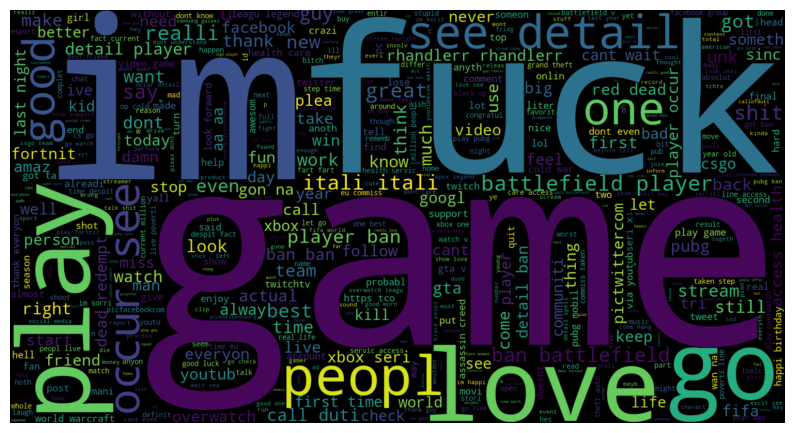

In [26]:
def wordcloud_text(text):
    
    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
positive_text = " ".join(data[data['Label'] == 0]['text'])  #here 0 for positive
wordcloud_text(positive_text) #for positive sentence

<Figure size 1000x500 with 0 Axes>

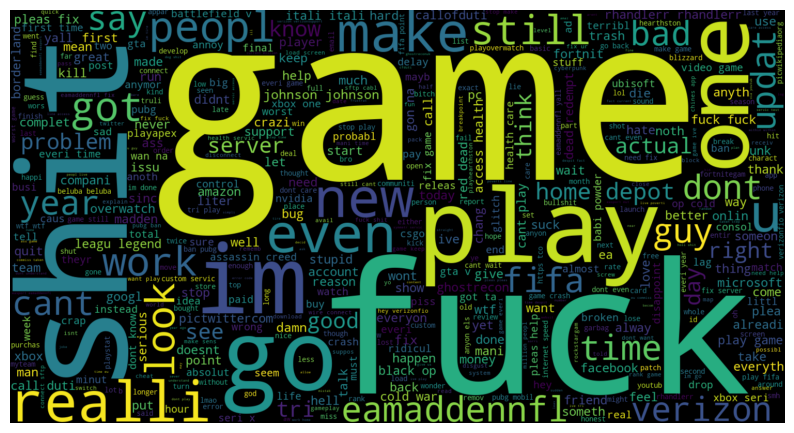

In [27]:
plt.figure(figsize=(10,5))
def wordcloud_text(text):
    
    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
negative_text = " ".join(data[data['Label'] == 1]['text'])# 1 for negative
wordcloud_text(negative_text)  #for negative

<Figure size 1000x500 with 0 Axes>

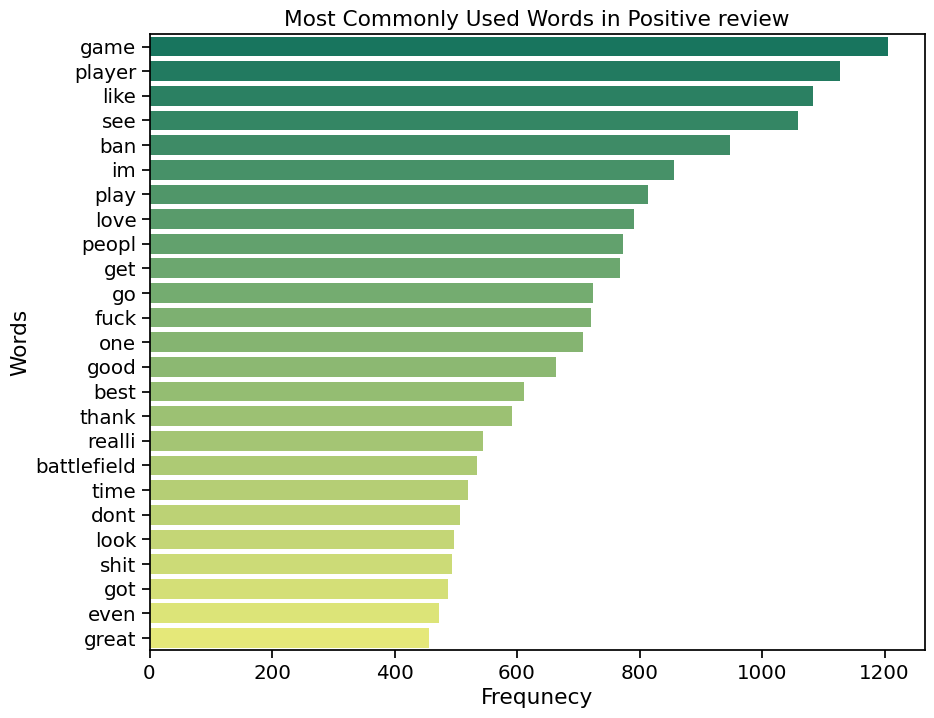

In [28]:
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Positive review")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show()


plot_words_freq((positive_text).split())

<Figure size 1000x500 with 0 Axes>

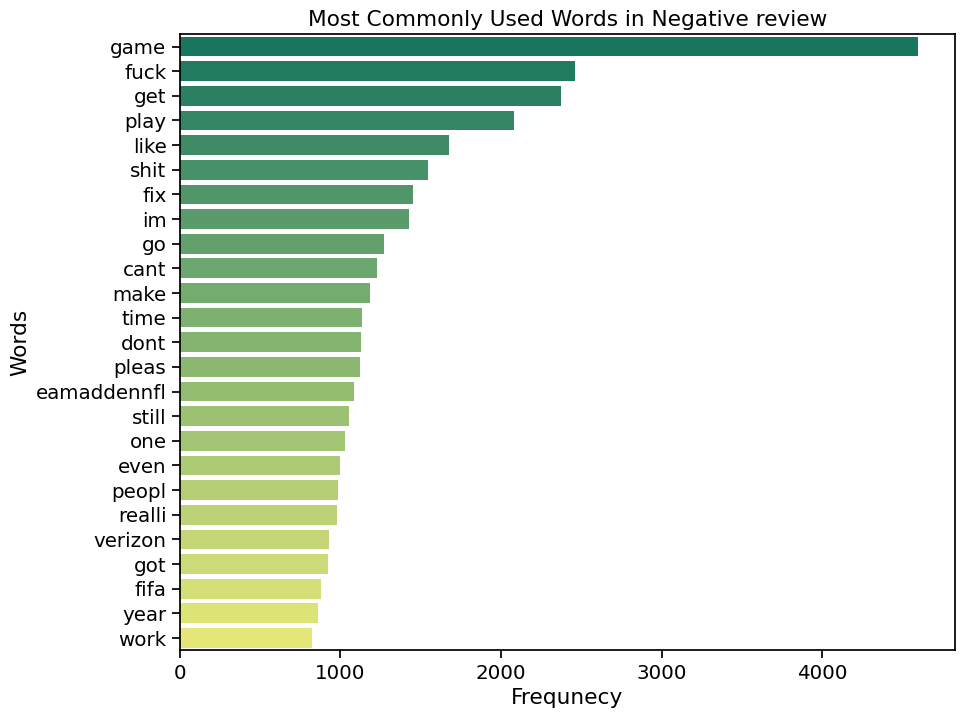

In [29]:
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Negative review")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show()


plot_words_freq((negative_text).split())

In [30]:
# Maximum number of words to be considered in the vocabulary
max_words = 10000 
# Maximum number of tokens in a sequence
max_len = 200 
# Tokenizer
tokenizer = Tokenizer(num_words = max_words) 
# Snap tokenizer to text data
tokenizer.fit_on_texts(data['text']) 
# Converts texts into strings of numbers
sequences_train = tokenizer.texts_to_sequences(data['text']) 
sequences_val = tokenizer.texts_to_sequences(data['text']) 
# Mapping words to indexes
word_index = tokenizer.word_index 

In [31]:
# Sequence padding
data_train = pad_sequences(sequences_train, maxlen = max_len)
data_val = pad_sequences(sequences_val, maxlen = max_len)

# Training the model

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the text data
X = vectorizer.fit_transform(data['text'])

# Define target variable
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
nb_model = MultinomialNB().fit(X_train, y_train)

nb_model.score(X_test,y_test)

0.690857490370971

# RNN with tensorflow

In [35]:
# Create the model
model = tf.keras.Sequential()
model.add(Embedding(max_words, 16, input_length = max_len))
model.add(GlobalAveragePooling1D())

model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Checking summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


In [36]:
print(data_train.shape)
print(data.shape)
print(data_val.shape)
print(test.shape)

(73995, 200)
(73995, 2)
(73995, 200)
(999, 2)


In [37]:
# Fit model
history = model.fit(data_train, data['Label'], epochs = 10, batch_size = 64, validation_data = (data_val,data['Label']))

Epoch 1/10
1157/1157 [==============================] - 2s 2ms/step - loss: -10.1738 - accuracy: 0.3022 - val_loss: -29.9636 - val_accuracy: 0.3022
Epoch 2/10
1157/1157 [==============================] - 2s 1ms/step - loss: -66.7894 - accuracy: 0.3022 - val_loss: -110.8752 - val_accuracy: 0.3022
Epoch 3/10
1157/1157 [==============================] - 2s 1ms/step - loss: -167.6075 - accuracy: 0.3022 - val_loss: -230.0864 - val_accuracy: 0.3022
Epoch 4/10
1157/1157 [==============================] - 2s 1ms/step - loss: -302.8169 - accuracy: 0.3022 - val_loss: -381.0327 - val_accuracy: 0.3022
Epoch 5/10
1157/1157 [==============================] - 2s 1ms/step - loss: -468.8542 - accuracy: 0.3022 - val_loss: -561.7823 - val_accuracy: 0.3022
Epoch 6/10
1157/1157 [==============================] - 2s 1ms/step - loss: -663.8002 - accuracy: 0.3022 - val_loss: -770.5416 - val_accuracy: 0.3022
Epoch 7/10
1157/1157 [==============================] - 2s 1ms/step - loss: -886.2038 - accuracy: 0.302

In [38]:
loss, accuracy = model.evaluate(data_val, data['Label'], verbose = 0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 30.215555


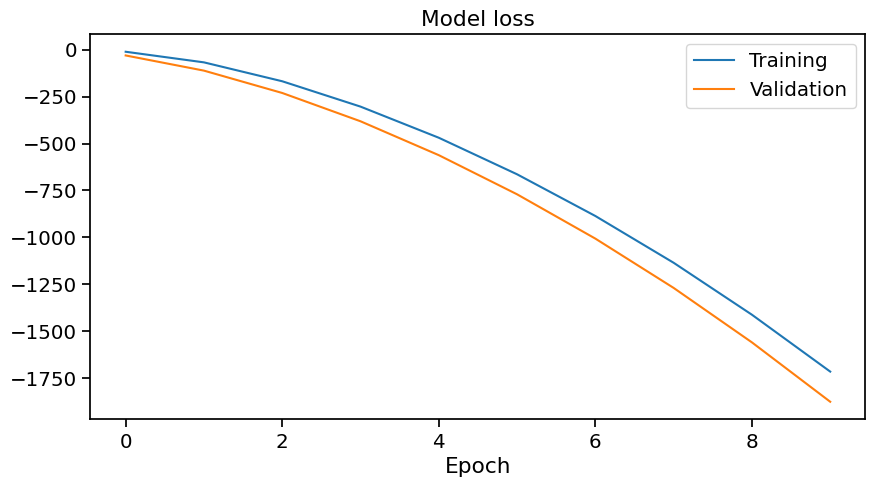

In [39]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()